# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

C:\Users\nesto\AppData\Local\Temp\ipykernel_14204\454529795.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Generate the Cities List by Using the `citipy` Library

In [ ]:
pip install citipy

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 617


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"
api_key = "13cc2a2055f0be7ffa83bcfc604c3905"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?appid={api_key}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
    # Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dauphin
Processing Record 2 of Set 1 | port elizabeth
Processing Record 3 of Set 1 | bela vista
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | mil'kovo
Processing Record 6 of Set 1 | ribeira grande
Processing Record 7 of Set 1 | san pedro
Processing Record 8 of Set 1 | constantia
Processing Record 9 of Set 1 | blackmans bay
Processing Record 10 of Set 1 | praia da vitoria
Processing Record 11 of Set 1 | alofi
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | luganville
Processing Record 14 of Set 1 | qaqortoq
Processing Record 15 of Set 1 | lethbridge
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | porto belo
Processing Record 18 of Set 1 | bamboo flat
Processing Record 19 of Set 1 | reyes
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1 | bilibino
Processing Record 22 of Set 1 | luwuk
Process

Processing Record 41 of Set 4 | armacao de buzios
Processing Record 42 of Set 4 | carnarvon
Processing Record 43 of Set 4 | wailua homesteads
Processing Record 44 of Set 4 | bonthe
Processing Record 45 of Set 4 | alesund
Processing Record 46 of Set 4 | maceio
Processing Record 47 of Set 4 | sungai penuh
Processing Record 48 of Set 4 | flying fish cove
Processing Record 49 of Set 4 | albu kamal
Processing Record 0 of Set 5 | lihue
Processing Record 1 of Set 5 | saruhanli
Processing Record 2 of Set 5 | portland
Processing Record 3 of Set 5 | khash
Processing Record 4 of Set 5 | miyazaki
Processing Record 5 of Set 5 | amahai
Processing Record 6 of Set 5 | waddan
Processing Record 7 of Set 5 | al muwayh
Processing Record 8 of Set 5 | ghadamis
Processing Record 9 of Set 5 | utrik
Processing Record 10 of Set 5 | la ronge
Processing Record 11 of Set 5 | churapcha
Processing Record 12 of Set 5 | oeiras do para
Processing Record 13 of Set 5 | kutum
Processing Record 14 of Set 5 | karachi
Proces

Processing Record 34 of Set 8 | birjand
Processing Record 35 of Set 8 | kristiansund
Processing Record 36 of Set 8 | fortaleza
Processing Record 37 of Set 8 | prado
Processing Record 38 of Set 8 | choyr
Processing Record 39 of Set 8 | chunskiy
Processing Record 40 of Set 8 | shimoda
Processing Record 41 of Set 8 | bichura
Processing Record 42 of Set 8 | tucupita
Processing Record 43 of Set 8 | khanty-mansiysk
Processing Record 44 of Set 8 | datong
Processing Record 45 of Set 8 | kerema
Processing Record 46 of Set 8 | vadso
Processing Record 47 of Set 8 | severo-yeniseyskiy
Processing Record 48 of Set 8 | palestine
Processing Record 49 of Set 8 | taseyevo
Processing Record 0 of Set 9 | fale old settlement
Processing Record 1 of Set 9 | zgurovka
Processing Record 2 of Set 9 | tomatlan
Processing Record 3 of Set 9 | labytnangi
Processing Record 4 of Set 9 | ituango
Processing Record 5 of Set 9 | hurghada
Processing Record 6 of Set 9 | kiunga
Processing Record 7 of Set 9 | hammerfest
Proce

Processing Record 25 of Set 12 | al burayqah
Processing Record 26 of Set 12 | male
Processing Record 27 of Set 12 | rio preto da eva
Processing Record 28 of Set 12 | dzhangala
Processing Record 29 of Set 12 | kencong
Processing Record 30 of Set 12 | gemena
Processing Record 31 of Set 12 | prince rupert
Processing Record 32 of Set 12 | kone
Processing Record 33 of Set 12 | nushki
Processing Record 34 of Set 12 | nova vicosa
Processing Record 35 of Set 12 | mantsala
Processing Record 36 of Set 12 | vernon
Processing Record 37 of Set 12 | plastun
Processing Record 38 of Set 12 | tanout
Processing Record 39 of Set 12 | karlskrona
Processing Record 40 of Set 12 | nsanje
Processing Record 41 of Set 12 | taungoo
Processing Record 42 of Set 12 | port douglas
Processing Record 43 of Set 12 | suva
Processing Record 44 of Set 12 | calama
Processing Record 45 of Set 12 | progreso
Processing Record 46 of Set 12 | hajin
Processing Record 47 of Set 12 | atasu
Processing Record 48 of Set 12 | mendefer

In [6]:
city_url

'http://api.openweathermap.org/data/2.5/weather?appid=b0c825d25ede774cd834224ae92733e3&q=ar rahad'

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          598
Lat           598
Lng           598
Max Temp      598
Humidity      598
Cloudiness    598
Wind Speed    598
Country       598
Date          598
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dauphin,51.1494,-100.0502,274.23,100,100,4.63,CA,1707114764
1,port elizabeth,-33.9180,25.5701,297.77,80,0,1.03,ZA,1707114764
2,bela vista,-22.1089,-56.5211,295.14,84,7,2.14,BR,1707114764
3,waitangi,-43.9535,-176.5597,291.94,82,70,0.45,NZ,1707115201
4,mil'kovo,55.6078,37.7956,271.42,97,100,2.21,RU,1707114765


In [15]:
import os

# Create the output_data directory if it doesn't exist
output_dir = "output_data"
os.makedirs(output_dir, exist_ok=True)

# Export the City_Data into a csv
city_data_df.to_csv(os.path.join(output_dir, "cities.csv"), index_label="City_ID")

In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [17]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dauphin,51.1494,-100.0502,274.23,100,100,4.63,CA,1707114764
1,port elizabeth,-33.9180,25.5701,297.77,80,0,1.03,ZA,1707114764
2,bela vista,-22.1089,-56.5211,295.14,84,7,2.14,BR,1707114764
3,waitangi,-43.9535,-176.5597,291.94,82,70,0.45,NZ,1707115201
4,mil'kovo,55.6078,37.7956,271.42,97,100,2.21,RU,1707114765


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

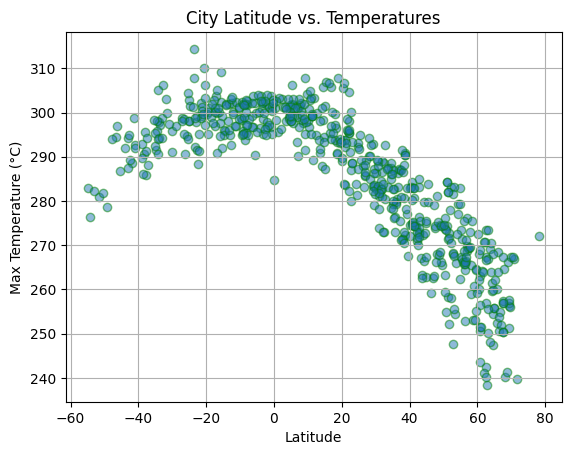

In [24]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="green", alpha=0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.title("City Latitude vs. Temperatures")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

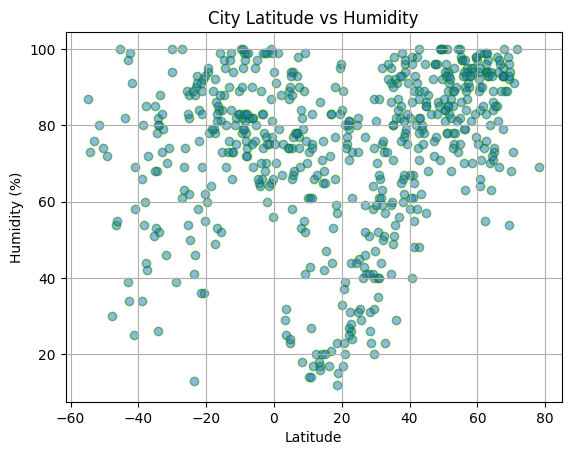

In [25]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="green", alpha=0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

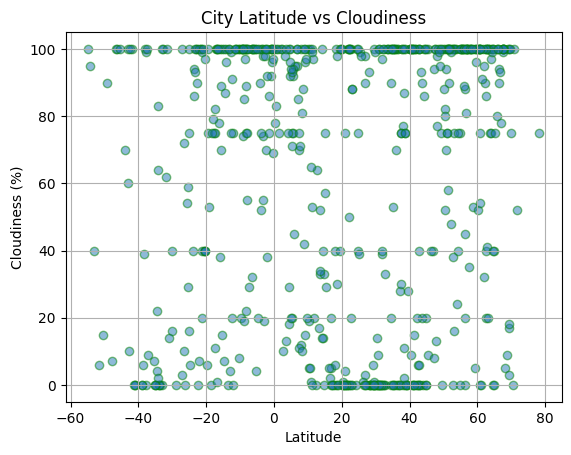

In [26]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="green", alpha=0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

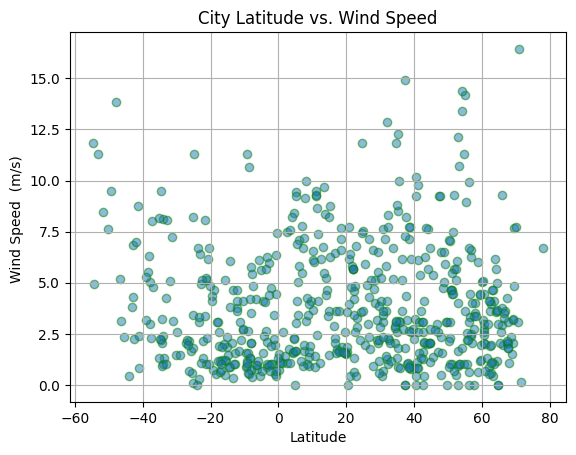

In [27]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="green", alpha=0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed  (m/s) ")
plt.title("City Latitude vs. Wind Speed")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [28]:
import scipy.stats as st

In [43]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x,y,x_label, y_label, hemisphere):
    slope, intercept, r_value, _, _=st.linregress(x, y)
    regress_values = x * slope + intercept

    plt.scatter(x, y, edgecolors="green", alpha=0.5)
    plt.plot(x, regress_values, "r-")

    equation = f"y = {slope:.2f}x + {intercept:.2f}"
    r_squared = f"R² = {r_value**2:.2f}"
    plt.annotate(equation, (min(x), max(y)), fontsize=12, color="red")
    plt.annotate(r_squared, (min(x), max(y) - 10), fontsize=12, color="red")

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"{hemisphere} - {x_label} vs. {y_label}")
    plt.grid(True)
    plt.savefig(f"output_data/{hemisphere}_{x_label.replace(' ','')}_vs_{y_label.replace(' ', '')}.png")
    plt.show()

In [44]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dauphin,51.1494,-100.0502,274.23,100,100,4.63,CA,1707114764
4,mil'kovo,55.6078,37.7956,271.42,97,100,2.21,RU,1707114765
5,ribeira grande,38.5167,-28.7000,290.80,96,100,7.15,PT,1707114765
6,san pedro,14.3500,121.0167,305.72,65,40,4.63,PH,1707114765
7,constantia,44.1833,28.6500,279.65,78,100,7.62,RO,1707114765


In [49]:
def plot_weather_relationships(data, hemisphere):
    # Example: Scatter plot for Max Temperature vs. Latitude
    plt.scatter(data["Lat"], data["Max Temp"], edgecolors="green", alpha=0.5)
    plt.xlabel("Latitude")
    plt.ylabel("Max Temperature (°C)")
    plt.title(f"{hemisphere} - Latitude vs. Max Temperature")
    plt.grid(True)
    plt.show()


In [45]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port elizabeth,-33.9180,25.5701,297.77,80,0,1.03,ZA,1707114764
2,bela vista,-22.1089,-56.5211,295.14,84,7,2.14,BR,1707114764
3,waitangi,-43.9535,-176.5597,291.94,82,70,0.45,NZ,1707115201
8,blackmans bay,-43.0167,147.3167,294.22,39,60,6.84,AU,1707115200
10,alofi,-19.0595,-169.9187,301.09,78,53,4.63,NU,1707114766


###  Temperature vs. Latitude Linear Regression Plot

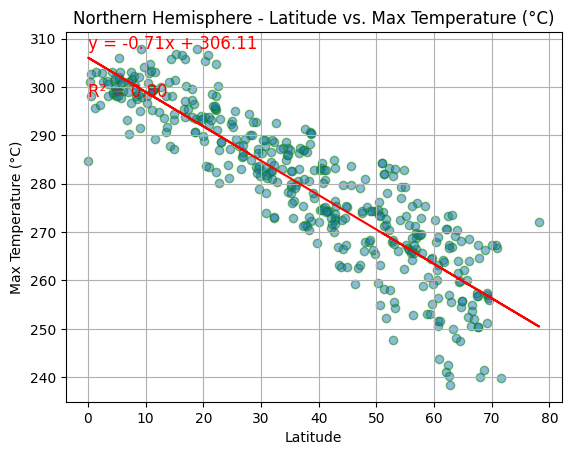

In [46]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temperature (°C)", "Northern Hemisphere")


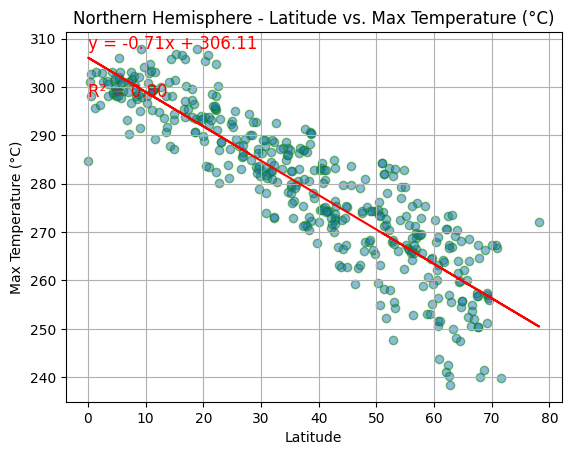

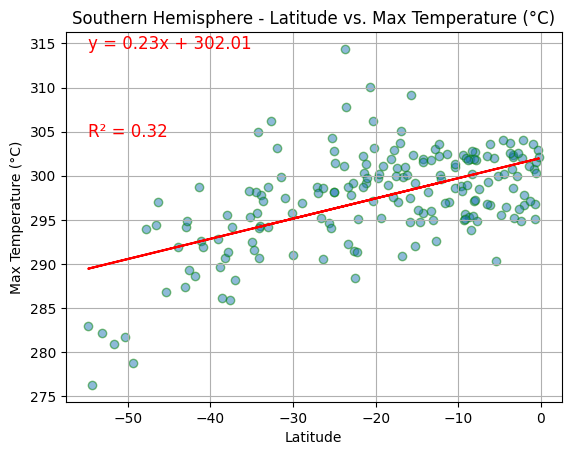

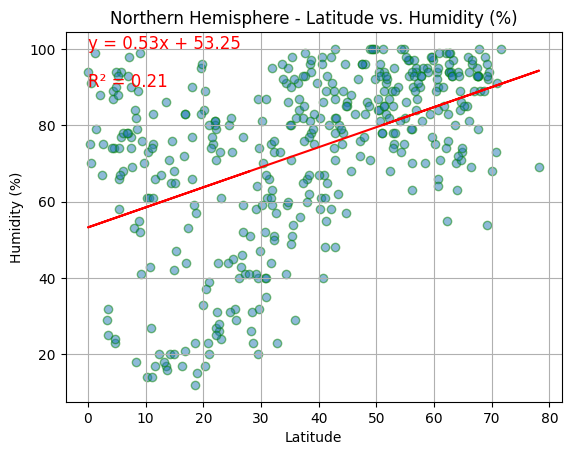

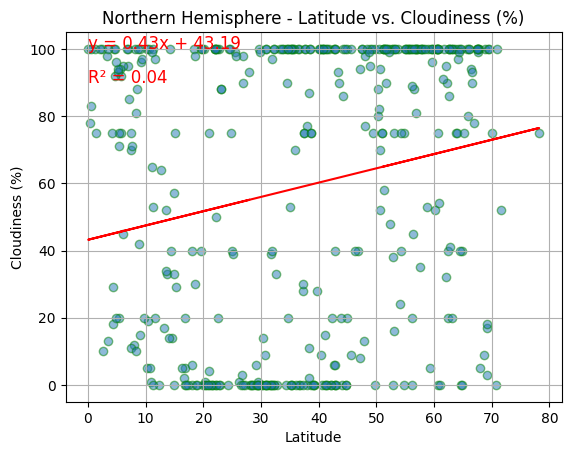

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/Northern Hemisphere_Latitude_vs_WindSpeed(m/s).png'

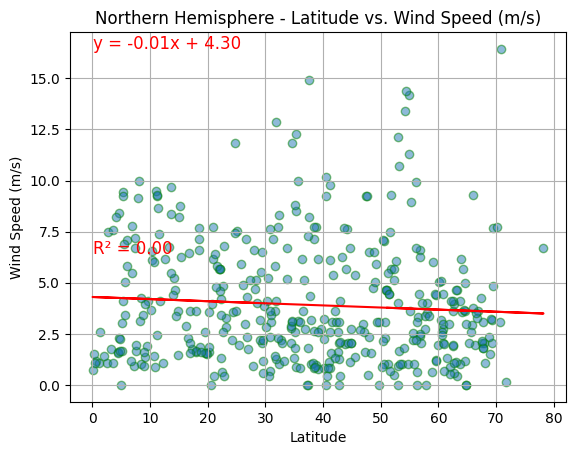

In [55]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temperature (°C)", "Northern Hemisphere")

# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temperature (°C)", "Southern Hemisphere")

# Linear regression on Humidity for the Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity (%)", "Northern Hemisphere")

# Linear regression on Cloudiness for the Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness (%)", "Northern Hemisphere")

# Linear regression on Wind Speed for the Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (m/s)", "Northern Hemisphere")


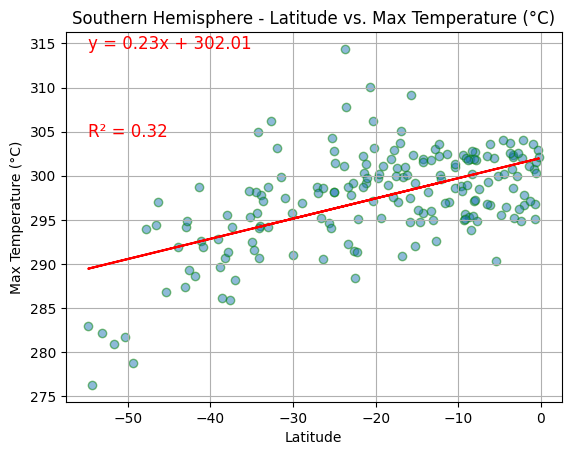

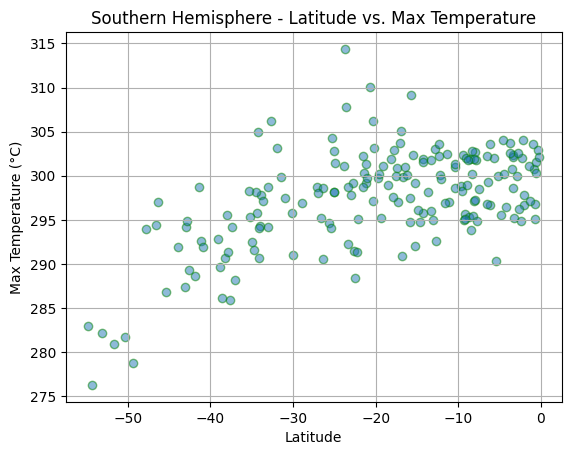

In [56]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temperature (°C)", "Southern Hemisphere")

# Linear regression on all weather variables for Northern Hemisphere
plot_weather_relationships(southern_hemi_df, "Southern Hemisphere")

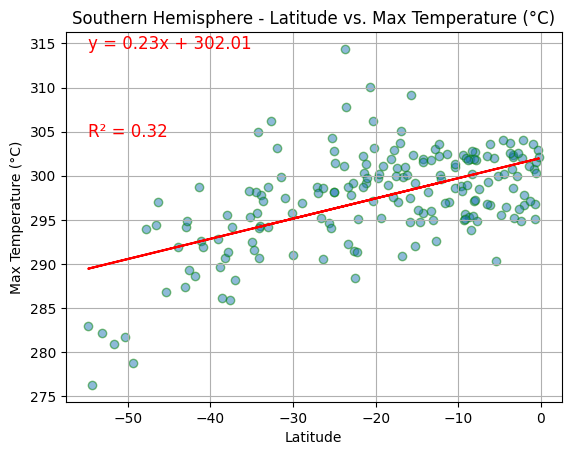

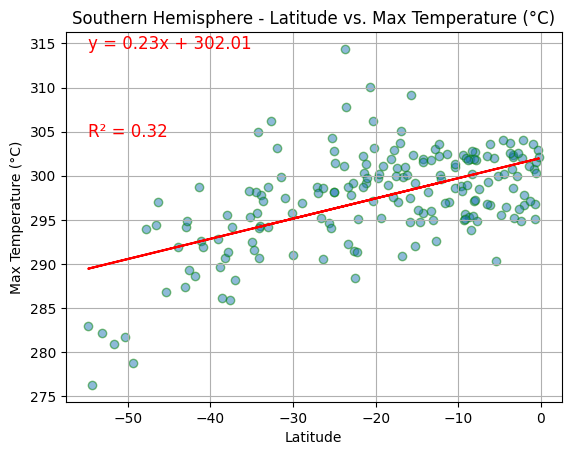

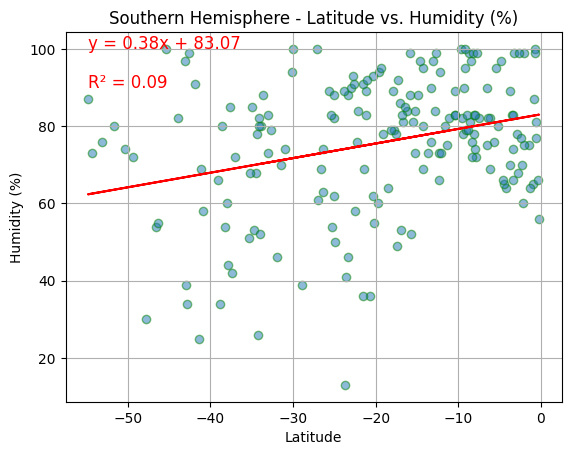

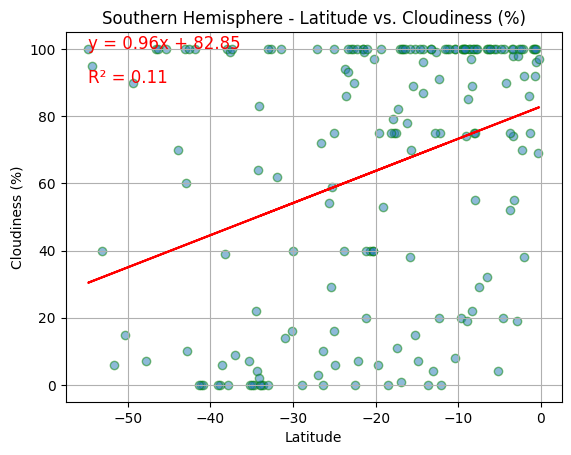

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/Southern Hemisphere_Latitude_vs_WindSpeed(m/s).png'

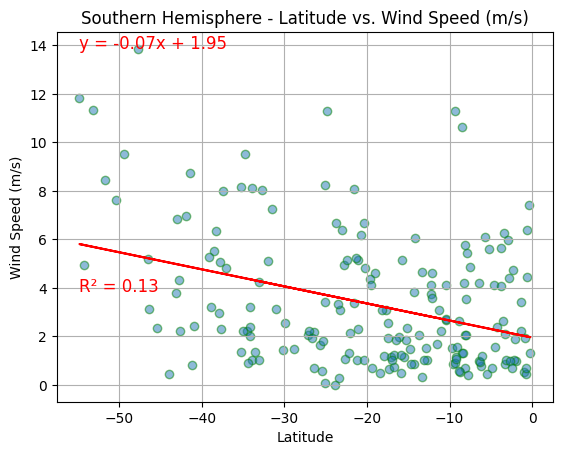

In [60]:
# Linear regression on Max Temperature for the Northern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temperature (°C)", "Southern Hemisphere")

# Linear regression on Max Temperature for the Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temperature (°C)", "Southern Hemisphere")

# Linear regression on Humidity for the Northern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity (%)", "Southern Hemisphere")

# Linear regression on Cloudiness for the Northern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness (%)", "Southern Hemisphere")

# Linear regression on Wind Speed for the Northern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (m/s)", "Southern Hemisphere")


**Discussion about the linear relationship:** Whenever looking at different weather charts in the Northern and Southern Hemispheres, we noticed the the highst temperatures are closer to the equator in the South, but farther away in the North. However, factos like humidity, cloudiness and wind speed don't allow us to see clear pattern in regards to latitudes. This tells us that altidudes are greatly distorted or affected with weather.

### Humidity vs. Latitude Linear Regression Plot

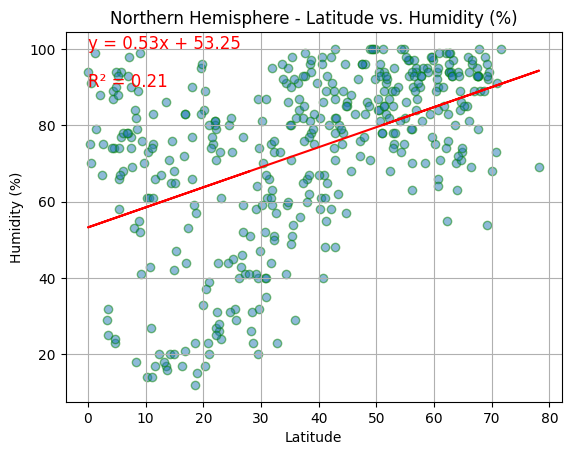

In [63]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity (%)", "Northern Hemisphere")

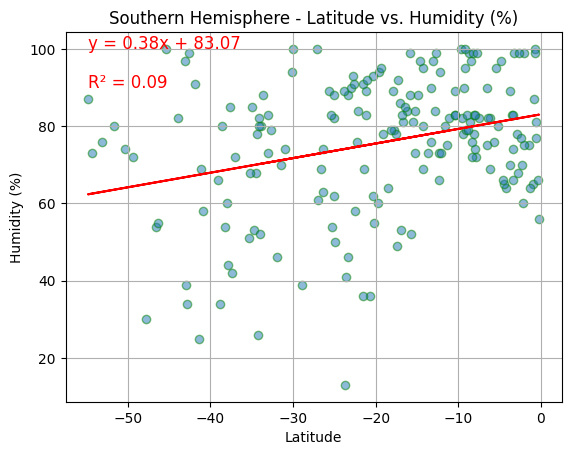

In [64]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity (%)", "Southern Hemisphere")

**Discussion about the linear relationship:** In looing at how humidity changes with latitude in the Northern and Southern hemispheres, we see a slight trend in the scatter plots. In the Northern hemisphere, humidy tends to go up a bit as latitude increases. Similarly, in the Southern hemisphere, there's a small increase in himidyty as you get closer to the equator. The regression lines show these trends with a gentle slope. In summary, there is a mild connection between humidity and latitude, bit its influence is small. Other factors must also affect humidity in both hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

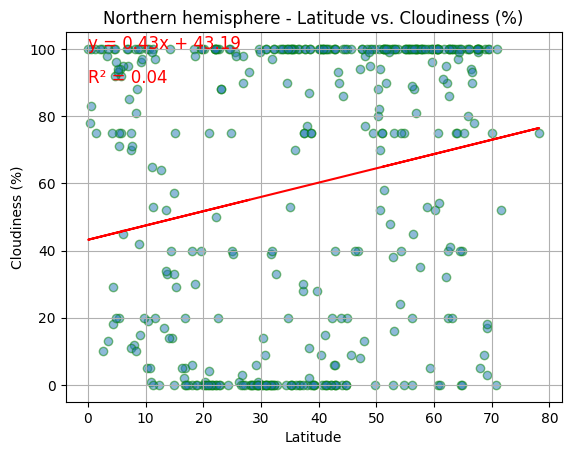

In [65]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness (%)", "Northern hemisphere")

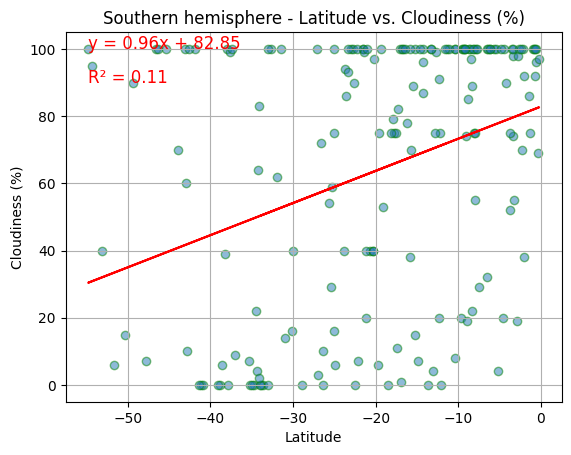

In [66]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness (%)", "Southern hemisphere")

**Discussion about the linear relationship:** Cloudiness in both hemispheres show a connection as latitude increases or decreases. This suggests that there is an increase in clouds as the latitudes change. 

### Wind Speed vs. Latitude Linear Regression Plot

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/Northern hemisphere_Latitude_vs_WindSpeed(m/s).png'

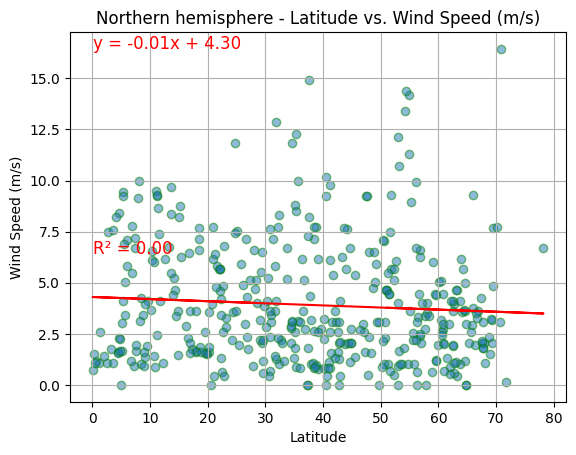

In [68]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (m/s)", "Northern hemisphere")


FileNotFoundError: [Errno 2] No such file or directory: 'output_data/Southern hemisphere_Latitude_vs_WindSpeed(m/s).png'

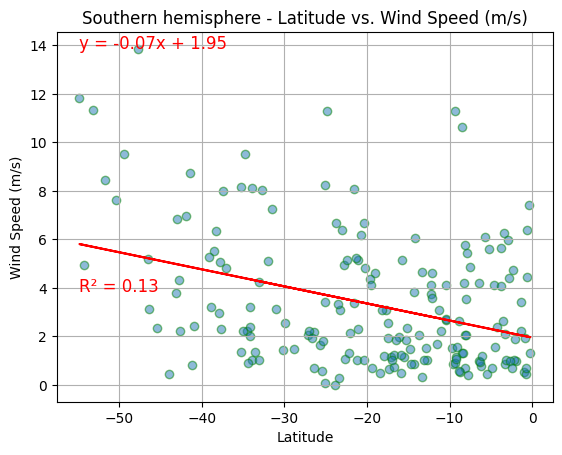

In [69]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (m/s)", "Southern hemisphere")

**Discussion about the linear relationship:** We looked at how wind speed changes with latitude inboth Northern and Southern hemispheres. In the north, data suggests a little increase in wind speed as you go to higher latitudes. In the south, there's a small rise in wind speed as you get closer to the equator. 